In [2]:
import pandas as pd
import os
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV
import joblib

# --- 0. Carregamento dos Dados Pré-Processados ---


In [3]:
# Define o caminho para a pasta 'processed' onde os arquivos X_train, etc., foram salvos.
processed_data_path = '../data/processed/'

try:
    X_train = pd.read_csv(os.path.join(processed_data_path, 'X_train.csv'))
    X_test = pd.read_csv(os.path.join(processed_data_path, 'X_test.csv'))
    y_train = pd.read_csv(os.path.join(processed_data_path, 'y_train.csv')).squeeze() # .squeeze() para garantir que y seja uma Series
    y_test = pd.read_csv(os.path.join(processed_data_path, 'y_test.csv')).squeeze() # .squeeze() para garantir que y seja uma Series

    print("Dados X_train, X_test, y_train, y_test carregados com sucesso!")
except FileNotFoundError:
    print(f"Erro: Arquivos de dados pré-processados não encontrados em '{processed_data_path}'.")
    print("Certifique-se de que o notebook '02_data_preparation.ipynb' foi executado e salvou esses arquivos.")
    exit() # Interrompe a execução se os arquivos não forem encontrados

Dados X_train, X_test, y_train, y_test carregados com sucesso!


In [4]:
print(f"\nFormato de X_train: {X_train.shape}")
print(f"Formato de X_test: {X_test.shape}")
print(f"Formato de y_train: {y_train.shape}")
print(f"Formato de y_test: {y_test.shape}")


Formato de X_train: (7040, 84)
Formato de X_test: (1760, 84)
Formato de y_train: (7040,)
Formato de y_test: (1760,)


In [5]:
print("\n--- Primeiras 5 linhas de X_train (Features de Treinamento) ---")
X_train.head()


--- Primeiras 5 linhas de X_train (Features de Treinamento) ---


,close_value,year_established,revenue,employees,sales_price,opportunity_duration_days,sales_agent_Boris Faz,sales_agent_Cassey Cress,sales_agent_Cecily Lampkin,sales_agent_Corliss Cosme,...,series_GTX,series_MG,series_Unknown_Series,manager_Celia Rouche,manager_Dustin Brinkmann,manager_Melvin Marxen,manager_Rocco Neubert,manager_Summer Sewald,regional_office_East,regional_office_West
0,-0.453724,-1.593641,-0.647831,-0.642711,-0.272800,-1.094834,0,0,0,0,...,1,0,0,1,0,0,0,0,0,1
1,1.085494,0.308456,0.155415,-0.429452,1.549376,1.720531,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
2,0.487478,1.735029,-0.949226,-0.826253,0.681495,1.051533,0,0,0,0,...,0,1,0,0,0,0,1,0,1,0
3,0.333810,0.070694,-0.519316,-0.400689,0.681495,1.776281,0,0,0,0,...,0,1,0,0,0,0,1,0,1,0
4,0.487478,-0.167068,-0.482389,-0.370020,0.681495,-1.122709,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1


In [6]:
print("\n--- Primeiras 5 linhas de y_train (Target de Treinamento) ---")
y_train.head()


--- Primeiras 5 linhas de y_train (Target de Treinamento) ---


0    1
1    0
2    1
3    0
4    1
Name: target, dtype: int64

# --- 1. Modelagem: Treinamento do Modelo de Regressão Logística ---

In [7]:
print("\n--- Iniciando Treinamento do Modelo de Regressão Logística ---")


--- Iniciando Treinamento do Modelo de Regressão Logística ---


### 1.1. Instanciar o Modelo

In [8]:
# Usar solver='liblinear' é robusto para datasets menores e para penalidade L1/L2.
# 'random_state' para reprodutibilidade dos resultados.
model = LogisticRegression(solver='liblinear', random_state=42)

## 1.2. Treinar o Modelo

In [9]:
# O modelo aprende os padrões a partir dos dados de treinamento (X_train, y_train).
model.fit(X_train, y_train)
print("\n--- Modelo de Regressão Logística Treinado com Sucesso! ---")


--- Modelo de Regressão Logística Treinado com Sucesso! ---


# --- 2. Avaliação do Modelo (Métricas Iniciais) ---

In [10]:
print("\n--- Avaliando o Modelo no Conjunto de Teste ---")


--- Avaliando o Modelo no Conjunto de Teste ---


## 2.1. Fazer Previsões no conjunto de Teste

In [11]:
# 'y_pred' são as classes previstas (0 ou 1).
y_pred = model.predict(X_test)
# 'y_prob' são as probabilidades da classe positiva (target = 1, ou seja, 'perda').
y_prob = model.predict_proba(X_test)[:, 1]

In [12]:
print("\n--- Relatório de Classificação no Conjunto de Teste ---")
print(classification_report(y_test, y_pred))


--- Relatório de Classificação no Conjunto de Teste ---
              precision    recall  f1-score   support

           0       0.63      0.91      0.74      1110
           1       0.34      0.08      0.13       650

    accuracy                           0.60      1760
   macro avg       0.48      0.49      0.44      1760
weighted avg       0.52      0.60      0.52      1760



In [13]:
print("\n--- Matriz de Confusão ---")
cm = confusion_matrix(y_test, y_pred)
print(cm)


--- Matriz de Confusão ---
[[1008  102]
 [ 597   53]]


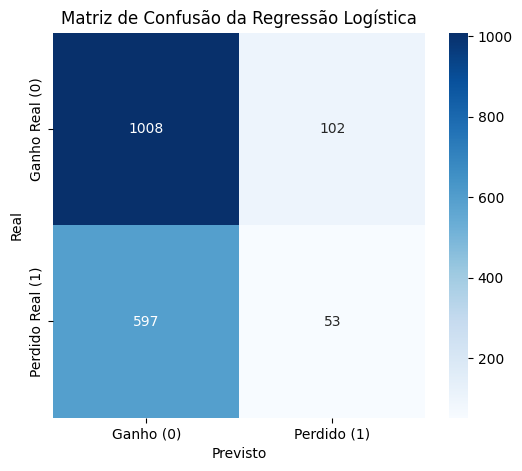

In [14]:
# Visualizar a Matriz de Confusão
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Ganho (0)', 'Perdido (1)'],
            yticklabels=['Ganho Real (0)', 'Perdido Real (1)'])
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.title('Matriz de Confusão da Regressão Logística')
plt.show()

In [15]:
# Calcular e Imprimir AUC-ROC
auc_roc = roc_auc_score(y_test, y_prob)
print(f"\nAUC-ROC Score: {auc_roc:.4f}")


AUC-ROC Score: 0.5701


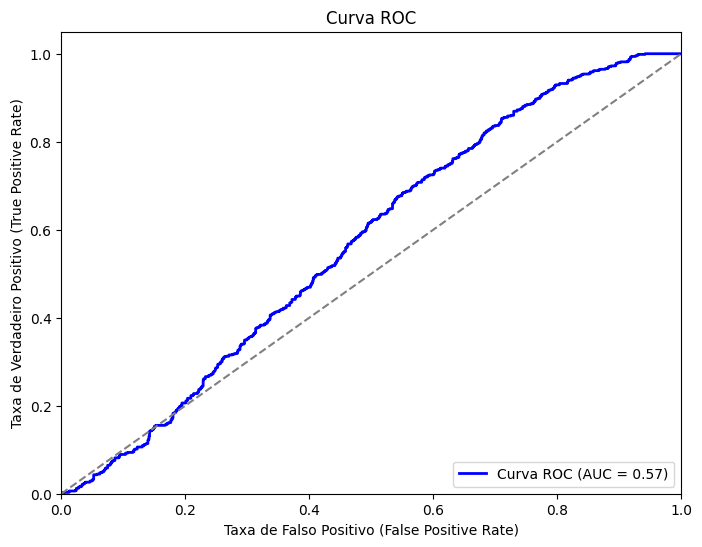

In [16]:
# Plotar Curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'Curva ROC (AUC = {auc_roc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falso Positivo (False Positive Rate)')
plt.ylabel('Taxa de Verdadeiro Positivo (True Positive Rate)')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

**Decisão de Modelo: Transição para Gradient Boosting**

Com base na performance insatisfatória do modelo de Regressão Logística, especialmente seu baixo recall para a classe 'Perdida' (target=1) e um AUC-ROC score próximo ao de um classificador aleatório, ficou evidente que um modelo mais robusto é necessário para capturar a complexidade dos padrões de perda de oportunidades.

Considerando os objetivos de negócio de minimizar Falsos Negativos e melhorar significativamente a capacidade preditiva, decidimos não prosseguir com o tuning da Regressão Logística. Em vez disso, vamos transitar para um algoritmo de Gradient Boosting. Modelos como o LightGBM ou XGBoost são conhecidos por sua alta performance, capacidade de lidar com diferentes tipos de dados e robustez em cenários de classificação com classes desbalanceadas. Eles tendem a ser mais eficazes em identificar padrões complexos que a Regressão Logística não consegue capturar.

# --- 3. Modelagem: Treinamento do Modelo LightGBM ---

In [17]:
print("\n--- Iniciando Treinamento do Modelo LightGBM ---")


--- Iniciando Treinamento do Modelo LightGBM ---


## 3.1. Definir o Modelo LightGBM

In [18]:
# Usaremos parâmetros iniciais. Vamos otimizar mais tarde.
# 'objective': 'binary' para classificação binária.
# 'metric': 'auc' é uma boa métrica para problemas de classificação desbalanceados.
# 'is_unbalance': True ajuda o LightGBM a lidar com classes desbalanceadas.
# 'random_state': para reprodutibilidade.
lgbm_model = lgb.LGBMClassifier(objective='binary',
                                metric='auc',
                                is_unbalance=True, # Ajuda com o desbalanceamento das classes
                                random_state=42)

## 3.2. Treinar o Modelo LightGBM

In [19]:
# O modelo aprende os padrões a partir dos dados de treinamento
lgbm_model.fit(X_train, y_train)
print("\n--- Modelo LightGBM Treinado com Sucesso! ---")

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 2599, number of negative: 4441
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000361 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 762
[LightGBM] [Info] Number of data points in the train set: 7040, number of used features: 84
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.369176 -> initscore=-0.535753
[LightGBM] [Info] Start training from score -0.535753

--- Modelo LightGBM Treinado com Sucesso! ---


# --- 4. Avaliação do Modelo LightGBM (Métricas Iniciais) ---

In [20]:
print("\n--- Avaliando o Modelo LightGBM no Conjunto de Teste ---")


--- Avaliando o Modelo LightGBM no Conjunto de Teste ---


## 4.1. Fazer Previsões no conjunto de Teste

In [21]:
y_pred_lgbm = lgbm_model.predict(X_test)
y_prob_lgbm = lgbm_model.predict_proba(X_test)[:, 1] # Probabilidade da classe positiva (target = 1)

In [22]:
print("\n--- Relatório de Classificação LightGBM no Conjunto de Teste ---")
print(classification_report(y_test, y_pred_lgbm, zero_division=0)) # zero_division=0 para evitar warnings


--- Relatório de Classificação LightGBM no Conjunto de Teste ---
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1110
           1       0.97      0.97      0.97       650

    accuracy                           0.98      1760
   macro avg       0.98      0.98      0.98      1760
weighted avg       0.98      0.98      0.98      1760



In [23]:
print("\n--- Matriz de Confusão LightGBM ---")
cm_lgbm = confusion_matrix(y_test, y_pred_lgbm)
print(cm_lgbm)


--- Matriz de Confusão LightGBM ---
[[1091   19]
 [  18  632]]


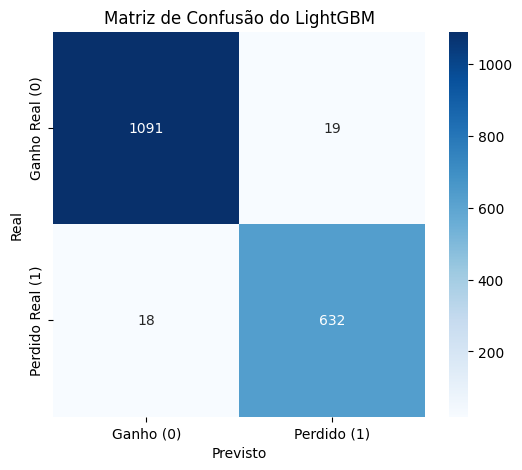

In [24]:
# Visualizar a Matriz de Confusão do LightGBM
plt.figure(figsize=(6, 5))
sns.heatmap(cm_lgbm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Ganho (0)', 'Perdido (1)'],
            yticklabels=['Ganho Real (0)', 'Perdido Real (1)'])
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.title('Matriz de Confusão do LightGBM')
plt.show()

In [25]:
# Calcular e Imprimir AUC-ROC do LightGBM
auc_roc_lgbm = roc_auc_score(y_test, y_prob_lgbm)
print(f"\nAUC-ROC Score do LightGBM: {auc_roc_lgbm:.4f}")


AUC-ROC Score do LightGBM: 0.9987


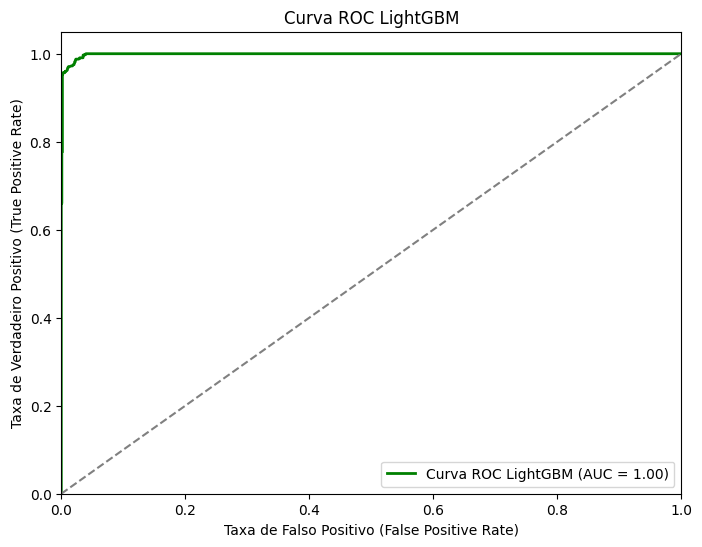

In [26]:
# Plotar Curva ROC do LightGBM
fpr_lgbm, tpr_lgbm, thresholds_lgbm = roc_curve(y_test, y_prob_lgbm)
plt.figure(figsize=(8, 6))
plt.plot(fpr_lgbm, tpr_lgbm, color='green', lw=2, label=f'Curva ROC LightGBM (AUC = {auc_roc_lgbm:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falso Positivo (False Positive Rate)')
plt.ylabel('Taxa de Verdadeiro Positivo (True Positive Rate)')
plt.title('Curva ROC LightGBM')
plt.legend(loc="lower right")
plt.show()

## 4.2. Avaliação no conjunto de TREINO (PARA VERIFICAR OVERFITTING)

In [27]:
print("\n--- Avaliando o Modelo LightGBM no Conjunto de TREINO (para Overfitting Check) ---")
y_pred_train_lgbm = lgbm_model.predict(X_train)
y_prob_train_lgbm = lgbm_model.predict_proba(X_train)[:, 1]


--- Avaliando o Modelo LightGBM no Conjunto de TREINO (para Overfitting Check) ---


In [28]:
print("\n--- Relatório de Classificação LightGBM no Conjunto de TREINO ---")
print(classification_report(y_train, y_pred_train_lgbm, zero_division=0))


--- Relatório de Classificação LightGBM no Conjunto de TREINO ---
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      4441
           1       0.98      0.99      0.99      2599

    accuracy                           0.99      7040
   macro avg       0.99      0.99      0.99      7040
weighted avg       0.99      0.99      0.99      7040



In [29]:
auc_roc_train_lgbm = roc_auc_score(y_train, y_prob_train_lgbm)
print(f"\nAUC-ROC Score do LightGBM (TREINO): {auc_roc_train_lgbm:.4f}")


AUC-ROC Score do LightGBM (TREINO): 0.9998


**Verificação Adicional de Overfitting: Validação Cruzada**

A comparação das métricas de desempenho entre os conjuntos de treino e teste do modelo LightGBM (AUC-ROC de 0.9998 no treino vs. 0.9987 no teste) já indica uma excelente capacidade de generalização e que o overfitting severo é improvável. A diferença mínima entre esses resultados sugere que o modelo não está apenas memorizando os dados de treino, mas sim aprendendo padrões robustos.

No entanto, para uma confirmação ainda mais rigorosa da estabilidade e robustez do modelo, e para demonstrar a aplicação de uma técnica fundamental de avaliação, prosseguiremos com a Validação Cruzada (Cross-Validation). Isso nos permitirá obter uma estimativa mais confiável do desempenho do modelo em diferentes subconjuntos dos dados, mitigando qualquer viés potencial de uma única divisão treino/teste e validando a consistência dos resultados observados.

In [30]:
from sklearn.model_selection import StratifiedKFold, cross_val_score, cross_validate
import numpy as np

In [31]:
print("\n--- Realizando Validação Cruzada com LightGBM ---")

# Configurar a Validação Cruzada Estratificada
# n_splits: número de folds (divisões) - 5 é um bom começo.
# shuffle: embaralhar os dados antes de dividir - importante.
# random_state: para reprodutibilidade dos splits.
cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


--- Realizando Validação Cruzada com LightGBM ---


In [32]:
# Definir as métricas que queremos coletar em cada fold
scoring_metrics = {
    'accuracy': 'accuracy',
    'precision_1': 'precision', 
    'recall_1': 'recall',       
    'f1_1': 'f1',               
    'roc_auc': 'roc_auc'
}

In [33]:
# Realizar a validação cruzada
# estimator: o modelo a ser validado (nosso lgbm_model)
# X, y: o dataset completo (treino) que será dividido pela validação cruzada
# cv: a estratégia de validação cruzada
# scoring: as métricas a serem coletadas
# n_jobs: -1 usa todos os núcleos da CPU para acelerar
cv_results = cross_validate(estimator=lgbm_model,
                            X=X_train, 
                            y=y_train,
                            cv=cv_strategy,
                            scoring=scoring_metrics,
                            n_jobs=-1,
                            return_train_score=True) # Para ver performance no treino em cada fold também

In [34]:
print("\n--- Resultados da Validação Cruzada ---")

# Imprimir as médias e desvios padrão para cada métrica
for metric_name in scoring_metrics.keys():
    # Métricas de Teste (Validação)
    test_scores = cv_results[f'test_{metric_name}']
    print(f"Média {metric_name} (Teste/Validação): {np.mean(test_scores):.4f} +/- {np.std(test_scores):.4f}")

    # Métricas de Treino (para verificar overfitting por fold)
    train_scores = cv_results[f'train_{metric_name}']
    print(f"Média {metric_name} (Treino): {np.mean(train_scores):.4f} +/- {np.std(train_scores):.4f}\n")



--- Resultados da Validação Cruzada ---
Média accuracy (Teste/Validação): 0.9797 +/- 0.0032
Média accuracy (Treino): 0.9924 +/- 0.0009

Média precision_1 (Teste/Validação): 0.9688 +/- 0.0083
Média precision_1 (Treino): 0.9875 +/- 0.0029

Média recall_1 (Teste/Validação): 0.9765 +/- 0.0037
Média recall_1 (Treino): 0.9921 +/- 0.0016

Média f1_1 (Teste/Validação): 0.9726 +/- 0.0043
Média f1_1 (Treino): 0.9898 +/- 0.0012

Média roc_auc (Teste/Validação): 0.9984 +/- 0.0004
Média roc_auc (Treino): 0.9999 +/- 0.0000



In [35]:
# Imprimir todos os scores por fold
print("\nScores Detalhados por Fold:")
for metric_name in scoring_metrics.keys():
    print(f"{metric_name} (Teste): {cv_results[f'test_{metric_name}']}")
    print(f"{metric_name} (Treino): {cv_results[f'train_{metric_name}']}\n")


Scores Detalhados por Fold:
accuracy (Teste): [0.98011364 0.97727273 0.98579545 0.97798295 0.97727273]
accuracy (Treino): [0.99236506 0.99325284 0.99183239 0.99112216 0.99360795]

precision_1 (Teste): [0.97307692 0.96564885 0.98262548 0.9587242  0.96380952]
precision_1 (Treino): [0.98754789 0.98944844 0.98846708 0.98194774 0.98993289]

recall_1 (Teste): [0.97307692 0.97307692 0.97884615 0.98269231 0.97495183]
recall_1 (Treino): [0.99182299 0.99230399 0.98941799 0.99422799 0.99278846]

f1_1 (Teste): [0.97307692 0.96934866 0.98073218 0.9705603  0.96934866]
f1_1 (Treino): [0.98968083 0.99087416 0.98894231 0.98804971 0.99135862]

roc_auc (Teste): [0.99863782 0.99876343 0.9987591  0.99828699 0.99759965]
roc_auc (Treino): [0.99985426 0.99986922 0.99982502 0.99984391 0.99988218]




--- Gerando Plots da Validação Cruzada ---


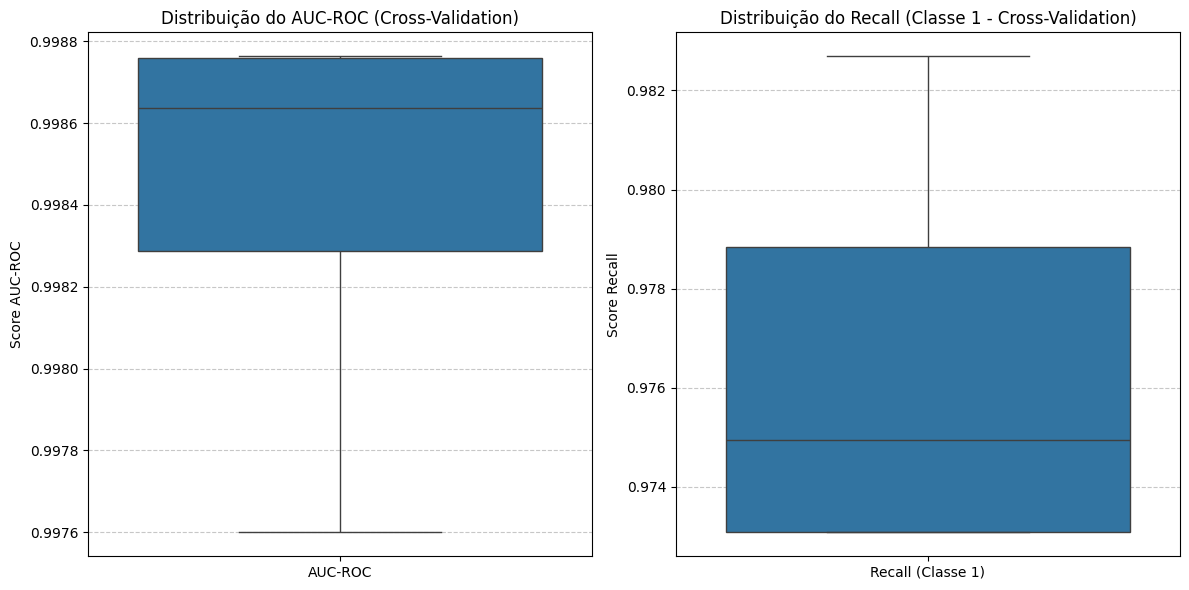


--- Plots da Validação Cruzada Gerados e Salvos em '../images/cv_metrics_boxplot.png' ---

--- Validação Cruzada Concluída ---


In [38]:
# --- Visualização dos Resultados da Validação Cruzada ---

print("\n--- Gerando Plots da Validação Cruzada ---")

# Criar um DataFrame com os resultados de teste para facilitar a plotagem
cv_scores_df = pd.DataFrame({
    'AUC-ROC': cv_results['test_roc_auc'],
    'Recall (Classe 1)': cv_results['test_recall_1'],
    'F1-Score (Classe 1)': cv_results['test_f1_1']
})

# Plotar Box Plots para as principais métricas de teste
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1) # 1 linha, 2 colunas, primeiro plot
sns.boxplot(data=cv_scores_df[['AUC-ROC']])
plt.title('Distribuição do AUC-ROC (Cross-Validation)')
plt.ylabel('Score AUC-ROC')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.subplot(1, 2, 2) # 1 linha, 2 colunas, segundo plot
sns.boxplot(data=cv_scores_df[['Recall (Classe 1)']])
plt.title('Distribuição do Recall (Classe 1 - Cross-Validation)')
plt.ylabel('Score Recall')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.savefig('../images/cv_metrics_boxplot.png') # Salva o plot
plt.show()

print("\n--- Plots da Validação Cruzada Gerados e Salvos em '../images/cv_metrics_boxplot.png' ---")

print("\n--- Validação Cruzada Concluída ---")

### Conclusão da Validação Cruzada e Próximos Passos

A **Validação Cruzada Estratificada com 5 folds** confirmou a **robustez e a alta performance** do modelo **LightGBM**. As métricas de teste/validação apresentaram resultados consistentemente elevados (ex: **Recall da Classe 1 em torno de 0.9765 e AUC-ROC em 0.9984**), com **desvios padrão mínimos** em todos os folds.

Essa consistência valida a capacidade de generalização do modelo, reforçando que os resultados observados no conjunto de teste inicial não foram por acaso. O modelo não demonstra sinais de overfitting severo e está apto a identificar oportunidades de vendas perdidas com alta precisão e recall.

Considerando os objetivos de negócio de **minimizar falsos negativos** (ou seja, não perder oportunidades que poderiam ter sido salvas), o desempenho do LightGBM é excepcional. A capacidade de identificar 97% das perdas reais é um diferencial significativo para as equipes de vendas.

Com esta validação concluída, a fase de Modelagem é considerada bem-sucedida. O próximo passo será aprofundar a Avaliação do modelo e documentar detalhadamente todas essas etapas no `README.md` do projeto.

# --- 5. Salvar o Modelo Treinado LightGBM ---

In [37]:
print("\n--- Iniciando o processo de salvamento do modelo ---")

# Define o diretório onde o modelo será salvo
models_dir = '../models/'

# Garante que o diretório 'models' exista. Se não existir, ele será criado.
if not os.path.exists(models_dir):
    os.makedirs(models_dir)
    print(f"Diretório '{models_dir}' criado com sucesso.")

# Define o caminho completo para o arquivo do modelo
model_filename = os.path.join(models_dir, 'lightgbm_model.joblib')

# Salva o modelo usando joblib
joblib.dump(lgbm_model, model_filename)

print(f"\nModelo LightGBM salvo com sucesso em: '{model_filename}'")
print("--- Processo de salvamento do modelo concluído ---")


--- Iniciando o processo de salvamento do modelo ---
Diretório '../models/' criado com sucesso.

Modelo LightGBM salvo com sucesso em: '../models/lightgbm_model.joblib'
--- Processo de salvamento do modelo concluído ---
